In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Import Data

In [27]:
df = pd.read_csv("Admission_Predict.csv")
df.head()


,Serial No.,gre,toefl,univrating,SOP,lor,CGPA,Research,admitchance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [30]:
df.to_csv('admit.csv',index=False)
df = pd.read_csv('admit.csv')


<bound method DataFrame.count of      Serial No.  gre  toefl  univrating  SOP  lor  CGPA  Research  admitchance
0             1  337    118           4  4.5  4.5  9.65         1         0.92
1             2  324    107           4  4.0  4.5  8.87         1         0.76
2             3  316    104           3  3.0  3.5  8.00         1         0.72
3             4  322    110           3  3.5  2.5  8.67         1         0.80
4             5  314    103           2  2.0  3.0  8.21         0         0.65
..          ...  ...    ...         ...  ...  ...   ...       ...          ...
395         396  324    110           3  3.5  3.5  9.04         1         0.82
396         397  325    107           3  3.0  3.5  9.11         1         0.84
397         398  330    116           4  5.0  4.5  9.45         1         0.91
398         399  312    103           3  3.5  4.0  8.78         0         0.67
399         400  333    117           4  5.0  4.0  9.66         1         0.95

[400 rows x 9 colu

In [4]:
df.shape

(400, 9)

In [5]:
print(df.describe)

<bound method NDFrame.describe of      Serial No.  gre  toefl  univrating  SOP  lor  CGPA  Research  admitchance
0             1  337    118           4  4.5  4.5  9.65         1         0.92
1             2  324    107           4  4.0  4.5  8.87         1         0.76
2             3  316    104           3  3.0  3.5  8.00         1         0.72
3             4  322    110           3  3.5  2.5  8.67         1         0.80
4             5  314    103           2  2.0  3.0  8.21         0         0.65
..          ...  ...    ...         ...  ...  ...   ...       ...          ...
395         396  324    110           3  3.5  3.5  9.04         1         0.82
396         397  325    107           3  3.0  3.5  9.11         1         0.84
397         398  330    116           4  5.0  4.5  9.45         1         0.91
398         399  312    103           3  3.5  4.0  8.78         0         0.67
399         400  333    117           4  5.0  4.0  9.66         1         0.95

[400 rows x 9 col

### Exploratory Data Analysis

In [6]:
corrMatrix = df.corr
corrMatrix

<bound method DataFrame.corr of      Serial No.  gre  toefl  univrating  SOP  lor  CGPA  Research  admitchance
0             1  337    118           4  4.5  4.5  9.65         1         0.92
1             2  324    107           4  4.0  4.5  8.87         1         0.76
2             3  316    104           3  3.0  3.5  8.00         1         0.72
3             4  322    110           3  3.5  2.5  8.67         1         0.80
4             5  314    103           2  2.0  3.0  8.21         0         0.65
..          ...  ...    ...         ...  ...  ...   ...       ...          ...
395         396  324    110           3  3.5  3.5  9.04         1         0.82
396         397  325    107           3  3.0  3.5  9.11         1         0.84
397         398  330    116           4  5.0  4.5  9.45         1         0.91
398         399  312    103           3  3.5  4.0  8.78         0         0.67
399         400  333    117           4  5.0  4.0  9.66         1         0.95

[400 rows x 9 colum

In [7]:
#MISSING VALUES CHECK
df.isnull().sum()


Serial No.     0
gre            0
toefl          0
univrating     0
SOP            0
lor            0
CGPA           0
Research       0
admitchance    0
dtype: int64

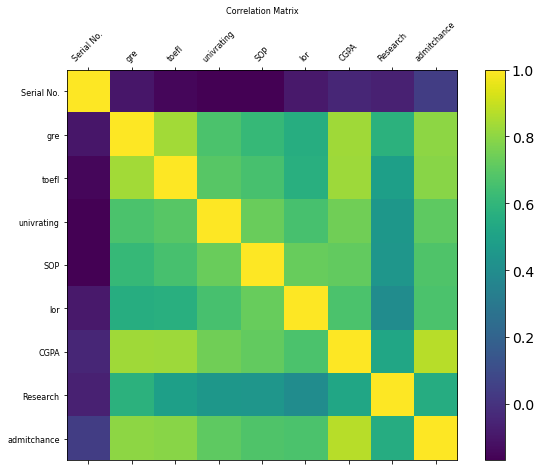

In [8]:
f = plt.figure(figsize=(10, 7))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=8);

3    0.3325
2    0.2675
4    0.1850
5    0.1500
1    0.0650
Name: univrating, dtype: float64


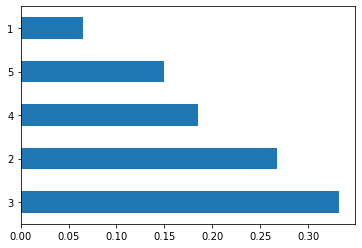

In [9]:
#UNIVARIATE ANALYSIS WITH UNIVRATING PREDICTOR TO KNOW STUDENTS IN TOP TO LEAST RATING UNIVERSITIES
import matplotlib.pyplot as plt
%matplotlib inline
data = df

print(data.univrating.value_counts(normalize=True))
#plot the bar graph of percentage University Ratings categories
data.univrating.value_counts(normalize=True).plot.barh()
plt.show()

3    0.3325
2    0.2675
4    0.1850
5    0.1500
1    0.0650
Name: univrating, dtype: float64


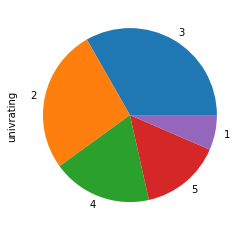

In [10]:
#UNIVARIATE ANALYSIS
print(data.univrating.value_counts(normalize=True))

#plot the pie chart of education categories
data.univrating.value_counts(normalize=True).plot.pie()
plt.show()

In [11]:
data.admitchance.describe()

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: admitchance, dtype: float64

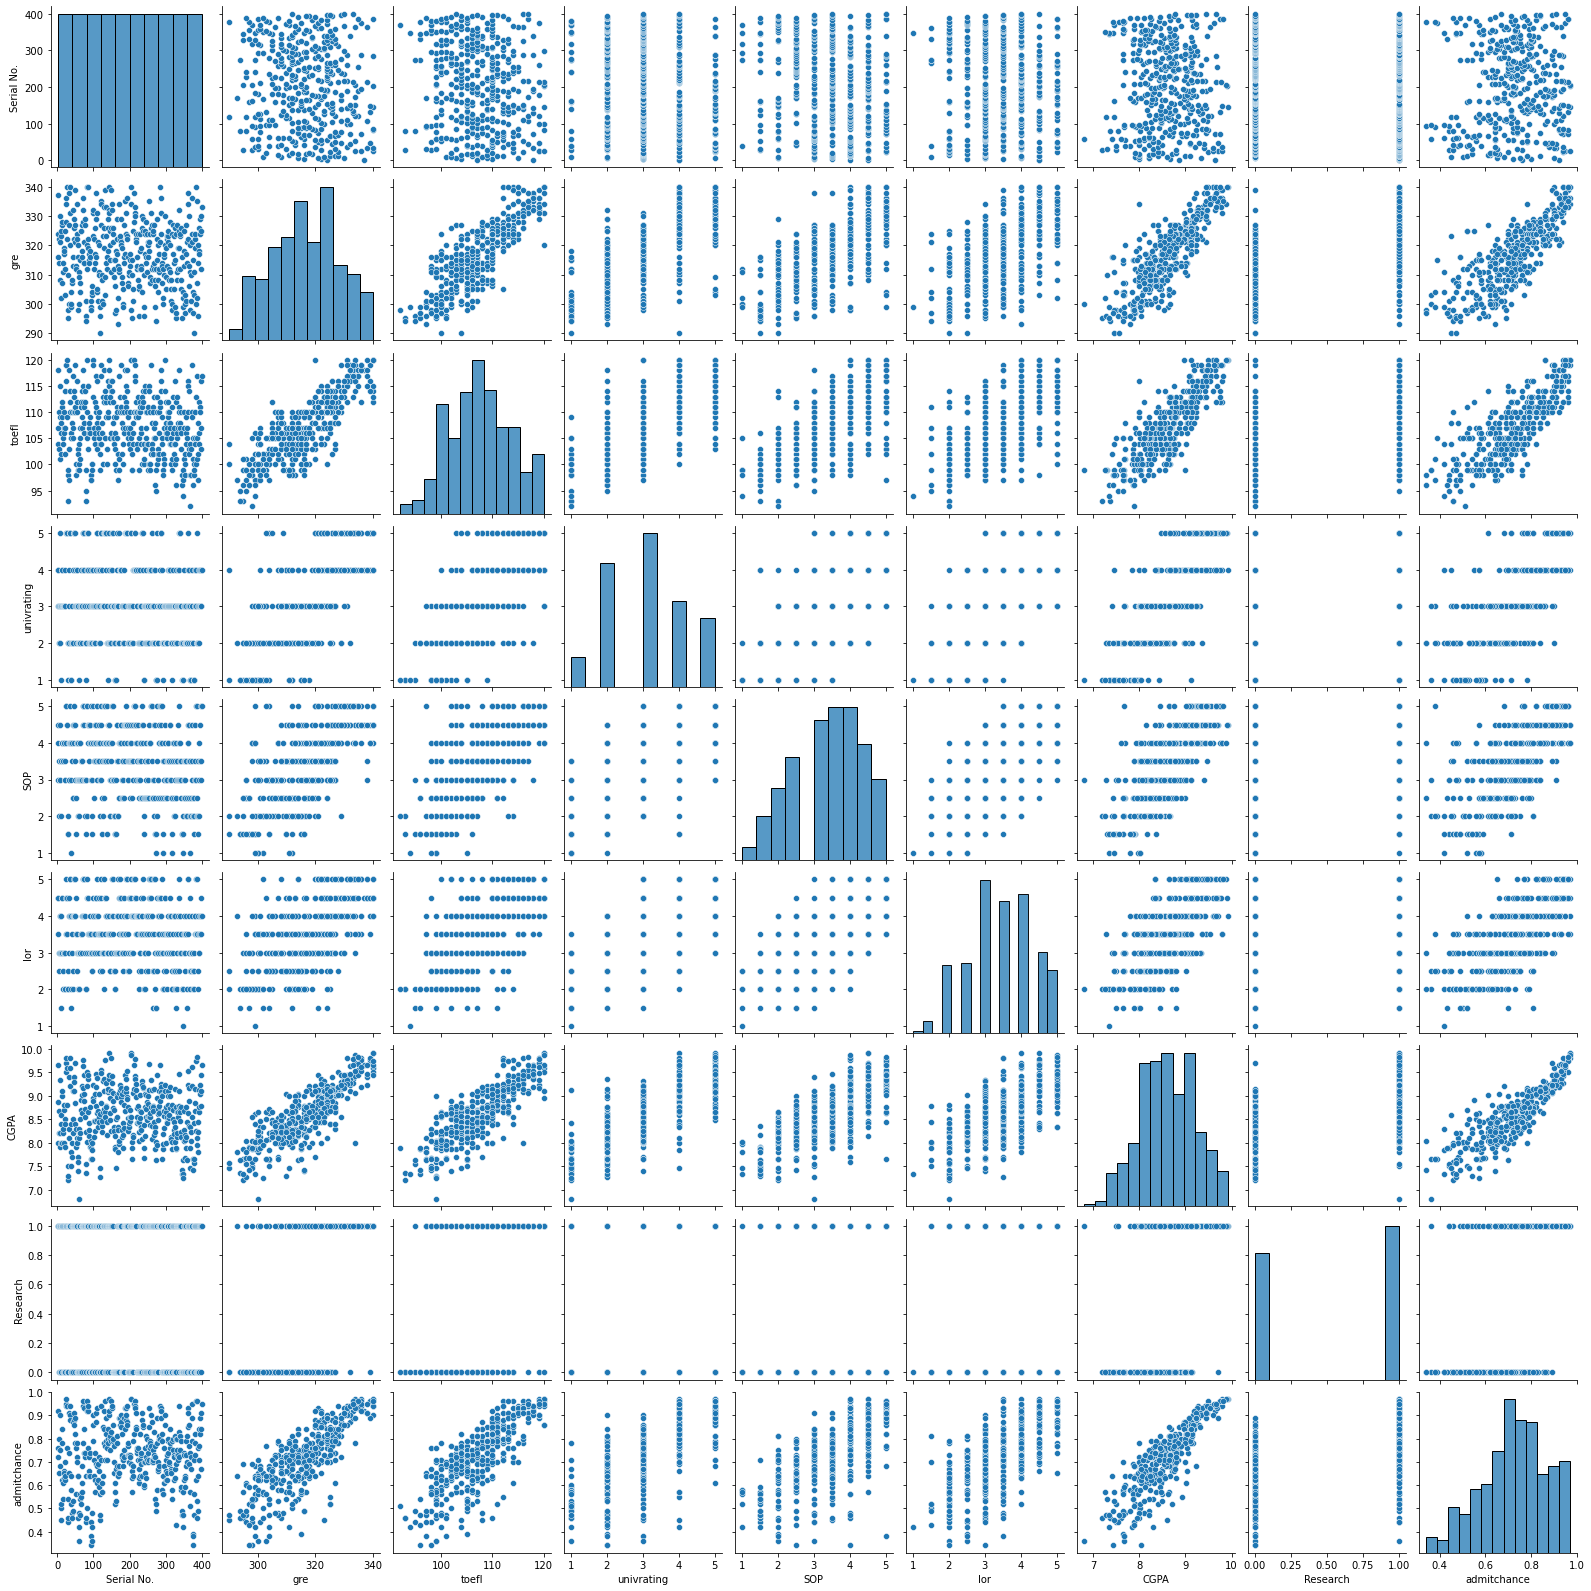

In [12]:
#pairplot
sns.pairplot(data = data)
plt.show()

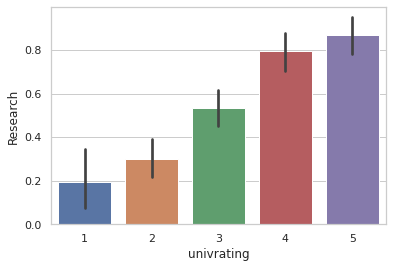

In [31]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="univrating", y="Research", data=data)

#### This bar graph depicts that for the student who got admit in universities which has rating of 4 and 5 has students who has More Research opportunities when compared to other universities

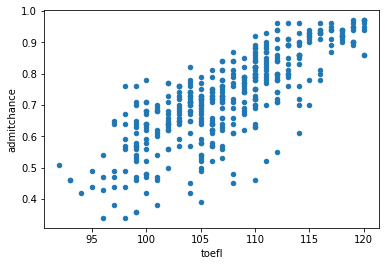

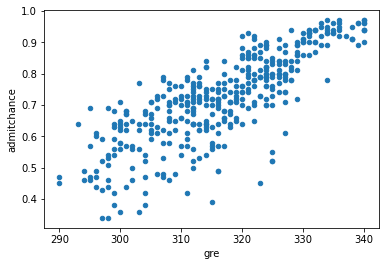

In [14]:
#plot the scatter plot of balance and salary variable in data
data.plot.scatter(x="toefl",y="admitchance")
plt.show()


#plot the scatter plot of balance and age variable in data
data.plot.scatter(x="gre",y="admitchance")
plt.show()

### SImple and Multiple Linear Regression using Statsmodels

In [15]:
#USING STATS MODELS
import statsmodels.api as sm
y = df['admitchance']
X= df[['gre']]
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            admitchance   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     720.6
Date:                Sat, 24 Oct 2020   Prob (F-statistic):           2.46e-91
Time:                        20:04:50   Log-Likelihood:                 418.65
No. Observations:                 400   AIC:                            -833.3
Df Residuals:                     398   BIC:                            -825.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4361      0.118    -20.677      0.000      -2.668      -2.204
gre            0.0100      0.000     26.843      0.000       0.009       0.011
==============================================================================
Omnibus:                       52.605   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.715
Skew:                          -0.860   Prob(JB):                     1.33e-17
Kurtosis:                       4.307   Cond. No.                     8.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
y = df['admitchance']
X= df[['toefl']]
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            admitchance   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     667.9
Date:                Sat, 24 Oct 2020   Prob (F-statistic):           3.63e-87
Time:                        20:07:02   Log-Likelihood:                 409.02
No. Observations:                 400   AIC:                            -814.0
Df Residuals:                     398   BIC:                            -806.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2734      0.077    -16.448      0.000      -1.426      -1.121
toefl          0.0186      0.001     25.845      0.000       0.017       0.020
==============================================================================
Omnibus:                       42.417   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.481
Skew:                          -0.799   Prob(JB):                     1.48e-12
Kurtosis:                       3.847   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
y = df['admitchance']
X= df[['CGPA']]
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            admitchance   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1279.
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          2.34e-126
Time:                        20:07:03   Log-Likelihood:                 499.61
No. Observations:                 400   AIC:                            -995.2
Df Residuals:                     398   BIC:                            -987.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0715      0.050    -21.285      0.000      -1.170      -0.973
CGPA           0.2088      0.006     35.759      0.000       0.197       0.220
==============================================================================
Omnibus:                       62.400   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.112
Skew:                          -0.926   Prob(JB):                     1.50e-23
Kurtosis:                       4.697   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
y = df['admitchance']
X= df[['Research']]
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            admitchance   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     175.5
Date:                Sat, 24 Oct 2020   Prob (F-statistic):           1.92e-33
Time:                        20:07:03   Log-Likelihood:                 285.05
No. Observations:                 400   AIC:                            -566.1
Df Residuals:                     398   BIC:                            -558.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6377      0.009     72.124      0.000       0.620       0.655
Research       0.1583      0.012     13.248      0.000       0.135       0.182
==============================================================================
Omnibus:                       30.520   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.302
Skew:                          -0.708   Prob(JB):                     2.16e-08
Kurtosis:                       3.337   Cond. No.                         2.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
y = df['admitchance']
X= df[['SOP']]
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            admitchance   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     334.4
Date:                Sat, 24 Oct 2020   Prob (F-statistic):           1.14e-54
Time:                        20:07:04   Log-Likelihood:                 333.97
No. Observations:                 400   AIC:                            -663.9
Df Residuals:                     398   BIC:                            -656.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3989      0.019     21.500      0.000       0.362       0.435
SOP            0.0957      0.005     18.288      0.000       0.085       0.106
==============================================================================
Omnibus:                       75.471   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.474
Skew:                          -1.056   Prob(JB):                     8.53e-31
Kurtosis:                       4.961   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
y = df['admitchance']
X= df[['lor']]
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            admitchance   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     324.0
Date:                Sat, 24 Oct 2020   Prob (F-statistic):           2.01e-53
Time:                        20:07:04   Log-Likelihood:                 331.10
No. Observations:                 400   AIC:                            -658.2
Df Residuals:                     398   BIC:                            -650.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3573      0.021     16.954      0.000       0.316       0.399
lor            0.1063      0.006     18.000      0.000       0.095       0.118
==============================================================================
Omnibus:                        7.695   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.575
Skew:                          -0.328   Prob(JB):                       0.0227
Kurtosis:                       3.158   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
y = df['admitchance']
X= df[['univrating']]
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            admitchance   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     407.5
Date:                Sat, 24 Oct 2020   Prob (F-statistic):           6.64e-63
Time:                        20:10:30   Log-Likelihood:                 352.98
No. Observations:                 400   AIC:                            -702.0
Df Residuals:                     398   BIC:                            -694.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4505      0.014     31.150      0.000       0.422       0.479
univrating     0.0887      0.004     20.186      0.000       0.080       0.097
==============================================================================
Omnibus:                       57.403   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.015
Skew:                          -0.900   Prob(JB):                     4.68e-20
Kurtosis:                       4.448   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### After the Simple Linear Regression, R Squared scores are 
##### gre- 0.644
##### toefl-0.627
##### cgpa- 0.763
##### research- 0.306
##### univrating- 0.506
##### SOP- 0.457
##### lor- 0.449

### After looking at the R squared scores, we are considering the factors which has more than 0.50 which are 
### gre, toefl, cgpa, univrating

In [24]:
y = df['admitchance']
X= df[['gre','toefl','CGPA','univrating']]
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            admitchance   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     369.8
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          4.41e-132
Time:                        20:14:19   Log-Likelihood:                 523.39
No. Observations:                 400   AIC:                            -1037.
Df Residuals:                     395   BIC:                            -1017.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4479      0.117    -12.401      0.000      -1.677      -1.218
gre            0.0022      0.001      3.754      0.000       0.001       0.003
toefl          0.0026      0.001      2.341      0.020       0.000       0.005
CGPA           0.1343      0.012     11.250      0.000       0.111       0.158
univrating     0.0119      0.004      2.698      0.007       0.003       0.021
==============================================================================
Omnibus:                       93.584   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.790
Skew:                          -1.208   Prob(JB):                     9.22e-45
Kurtosis:                       5.516   Cond. No.                     1.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
y = df['admitchance']
X= df[['gre','toefl','CGPA','univrating','Research','SOP','lor']]
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            admitchance   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          3.12e-134
Time:                        20:14:52   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2594      0.125    -10.097      0.000      -1.505      -1.014
gre            0.0017      0.001      2.906      0.004       0.001       0.003
toefl          0.0029      0.001      2.680      0.008       0.001       0.005
CGPA           0.1189      0.012      9.734      0.000       0.095       0.143
univrating     0.0057      0.005      1.198      0.232      -0.004       0.015
Research       0.0245      0.008      3.081      0.002       0.009       0.040
SOP           -0.0033      0.006     -0.594      0.553      -0.014       0.008
lor            0.0224      0.006      4.034      0.000       0.011       0.033
==============================================================================
Omnibus:                       87.895   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.191
Skew:                          -1.159   Prob(JB):                     4.52e-40
Kurtosis:                       5.344   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# The Equation is 
#### Y(admitchance) = -1.2594 +   0.0017x1  +   0.0028x2  +  0.1189x3   +   0.0057x4  +  0.0245x5   -   0.0033x6  +    0.0224x7

# SKLEARN 
#### Predicting values and graph for it

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [26]:
Y = data['admitchance']
X= data[['gre','toefl','CGPA','Research','univrating','SOP','lor']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 3)
print(X)
print(Y)

     gre  toefl  CGPA  Research  univrating  SOP  lor
0    337    118  9.65         1           4  4.5  4.5
1    324    107  8.87         1           4  4.0  4.5
2    316    104  8.00         1           3  3.0  3.5
3    322    110  8.67         1           3  3.5  2.5
4    314    103  8.21         0           2  2.0  3.0
..   ...    ...   ...       ...         ...  ...  ...
395  324    110  9.04         1           3  3.5  3.5
396  325    107  9.11         1           3  3.0  3.5
397  330    116  9.45         1           4  5.0  4.5
398  312    103  8.78         0           3  3.5  4.0
399  333    117  9.66         1           4  5.0  4.0

[400 rows x 7 columns]
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: admitchance, Length: 400, dtype: float64


In [27]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [28]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

            Coefficient
gre            0.000877
toefl          0.003772
CGPA           0.120674
Research       0.032619
univrating     0.003413
SOP           -0.001299
lor            0.023925


In [29]:
y_pred = model.predict(X_test)

In [30]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
print(df.head(10))

     Actual  Predicted
376    0.34   0.467594
16     0.66   0.705267
365    0.86   0.835168
82     0.92   0.855997
107    0.91   0.925680
217    0.85   0.828165
396    0.84   0.807638
56     0.64   0.531254
250    0.74   0.702850
40     0.46   0.657487


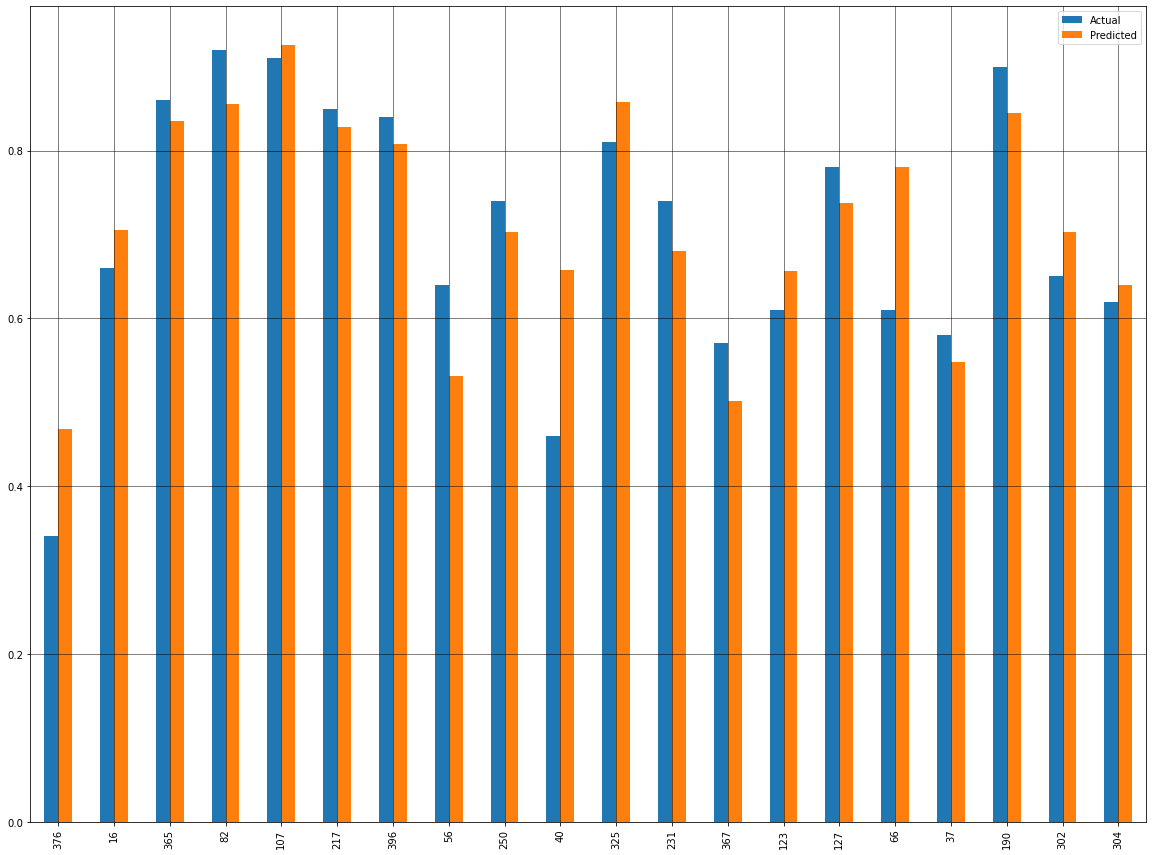

In [31]:
df1 = df.head(20)

df1.plot(kind='bar',figsize=(20,15))
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.show()

In [32]:
# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

Intercept: 
 -1.1029622557101584
Root Mean Square Error 
 0.06779634714822805
R^2 Value: 
 0.7926301384417996


The RMSE score for this model is 0.067796
and this model is 79.26% accurate in predicting that a student gets the admit with certain criteria